#**UFAZ L2 S1. Signal Processing Assignment 2&3**
### Practical and Theoretical Part (Exercise 3)
#### *Professor*: Rodrigo ABARCA-DEL-RIO
#### *Student*: Kamal AHMADOV
#### *№ Étudiant*: 22022692

# **Exercise 3**: **APPLICATION OF EXPONENTIAL FILTERING AND PREDICTION** 

## **3.1 - Understanding the basics**

For this I will need data from previous assignment, specifically the so-called Matrix B. Let's retrieve it again.

In [ ]:
#import of necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Matrix_A = pd.read_csv('matrix.csv', index_col=0).squeeze("columns")
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
Matrix_A.columns = [months]
Matrix_A.index.name = None

# sorting all data into Matrix_B
Matrix_B = {}
values = []
years = list(Matrix_A.index.values)
for i in years:
    for y in months:
        Matrix_B[str(str(i)+' '+y)] = Matrix_A.loc[i][y]
        values.append(Matrix_A.loc[i][y])

# put data from Matrix B to dataframe

df = pd.DataFrame(Matrix_B.items(), columns=['Date', 'Value'])
df=df.set_index('Date')
print(df)


                Value
Date                 
1997 January     3.45
1997 February    2.15
1997 March       1.89
1997 April       2.03
1997 May         2.25
...               ...
2021 August      4.07
2021 September   5.16
2021 October     5.51
2021 November    5.05
2021 December    3.76

[300 rows x 1 columns]


Now we have the matrix B, let's define a function for this differentiation that will also plot the required graph. This differentiation can be referred as first order difference. Let's call it FOD. 

In [ ]:
def FOD(matrix: dict) -> dict:
  keys = list(matrix.keys())
  values = list(matrix.values())
  case_zero = values[0]
  FODs = []
  for i in range(len(values)):
    if i != 0:
      FODs.append(values[i] - values[i-1])
    else:
      # in the case of the element with index zero, there is no previous value,
      # so let's set the first value of FOD array to the first value of input data
      FODs.append(case_zero)
  
  #returning dictionary of keys and FOD values 
  return dict(zip(list(keys),list(FODs)))

Result = FOD(Matrix_B) #call to the function

df = pd.DataFrame(Result.items(), columns=['Date', 'Value'])
df=df.set_index('Date')

print(df)


                Value
Date                 
1997 January     3.45
1997 February   -1.30
1997 March      -0.26
1997 April       0.14
1997 May         0.22
...               ...
2021 August      0.23
2021 September   1.09
2021 October     0.35
2021 November   -0.46
2021 December   -1.29

[300 rows x 1 columns]


Now, plotting

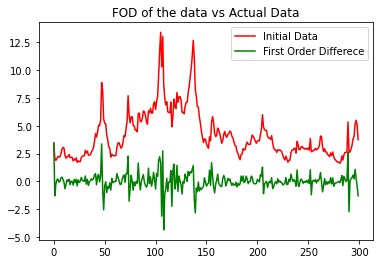

In [ ]:
figure = plt.figure()
plt.plot(list(Matrix_B.values()), color='r', label="Initial Data")
plt.plot(list(Result.values()), color='g', label="First Order Differece")
plt.title('FOD of the data vs Actual Data')
plt.legend()
plt.show()



The question was what happened and why it happened. <br>

Finding First Order difference for a dataset can be interpreted as some sort of smoothing operation. As you can see from the plot, the data has become less fluctating and it also looks like the original plot but about 2 times shorter in height. Basically we removed the noise of the dataset. 

On the other hand, by applying first order difference on a dataset we are losing original data. When you calculate the first-order difference of a time series dataset, it helps reduce noise in the data by removing the trend. 

A trend can be defined as a long-term upward or downward movement in the data, which can be caused by various factors such as inflation, population growth, or technological advancements.
When you calculate the first-order difference of a time series dataset, it removes the trend and linear dependence from the signal. The first-order difference is calculated by subtracting each value in the time series from the value that comes before it. This process is also known as differencing, and it's often used to remove the trend and make a time series stationary.

The reason why the first-order difference graph is similar to the initial one but about 2 times shorter in height is because the trend has been removed from the data. This can be seen by the fact that the overall level of the first-order difference graph is shifted down by the amount of the trend. The slope of the trend is removed in the first-order difference, so the amplitude of the fluctuations is reduced by a factor of 2.

It's important to note that while the first-order difference can be useful in making a time series stationary, it can also cause information loss, since the original data's characteristics are altered. It's important to understand the underlying process and characteristics of the data before deciding to use it.

Additionally, It's also important to note that, depending on the time series model that is being used, a first-order difference might be a requirement. Some models such as ARIMA models, require the data to be stationary before fitting the model.

## **3.2 - Experiment with the so-called Holt Filter**
$$Holt \; Filter \; Implementation$$

$$Y(t) = α\cdot X(t) + (1 − α) \cdot Y(t − 1)$$


This equation represents the Holt Filter Alrorithm. In the equation: <br>
*   $Y(t)$: This is the filtered value at time t. This is the value that the Holt filter is trying to estimate.

*   $α$: This is the smoothing factor. It's a value between 0 and 1 that determines the weight given to the current value $X(t)$ and the previous filtered value $Y(t-1)$. The closer to 1, the more weight is given to the current value and the more responsive the filter will be to changes in the data. A value closer to 0 will give more weight to the previous filtered value and will make the filter less responsive to changes in the data.

*   $X(t)$: This is the original value at time $t$. It's the value of the time series signal before it's filtered.

*   $Y(t-1)$: This is the filtered value at the previous time step $(t-1)$. It represents the filtered value at the previous time step that is used to estimate the current filtered value.

The Holt filter algorithm uses a weighted moving average method, where the weights are determined by the smoothing factor $α$. The algorithm uses the current value $X(t)$ and the previous filtered value $Y(t-1)$ to estimate the current filtered value $Y(t)$. The idea behind this algorithm is that the filtered value at time t is a combination of the current value and the previous filtered value, with the weights determined by the smoothing factor. This way, it takes into account both the short-term and long-term patterns in the time series data.

It was asked to figure out how to start since there is no $Y(t-1)$ information at the beginning. Actually it is very simple, we would just assign the first value of filtered array to the first value of the input array



In [ ]:
def holt_filter(data, alpha):
    """
    Function to apply the Holt filter to a time series dataset.
    Parameters:
    - data: The time series data
    - alpha: The smoothing factor (0 < α < 1)
    Returns:
    - filtered: The filtered time series data
    """
    filtered = [data[0]]  # Initialize the filtered data with the first value
    #starting from 1 since there is already first value
    for i in range(1, len(data)): 
        filtered.append(alpha * data[i] + (1 - alpha) * filtered[i-1])
    return filtered


Let's retrieve the values from Matrix B for further convenience

In [ ]:
Values = list(Matrix_B.values())

It is said that the result is evident for $α=0$ or $α=1$.
<br>
And yes, it really is and it is very logical. For 0, it will make all the elements of the filtered array the first element of the input array and for 1 it will leave the input array unchanged. We can check it just in case.

In [ ]:
alpha_zero = holt_filter(Values, 0)
alpha_one = holt_filter(Values, 1)

# array for checking the case of 0
check_zero = [Values[0]]*len(Values)

print(alpha_zero == check_zero)
print(alpha_one == Values)

True
True


True for both cases, as expected! <br>
Now let's check for different values of various values of $α$, and plot the data.

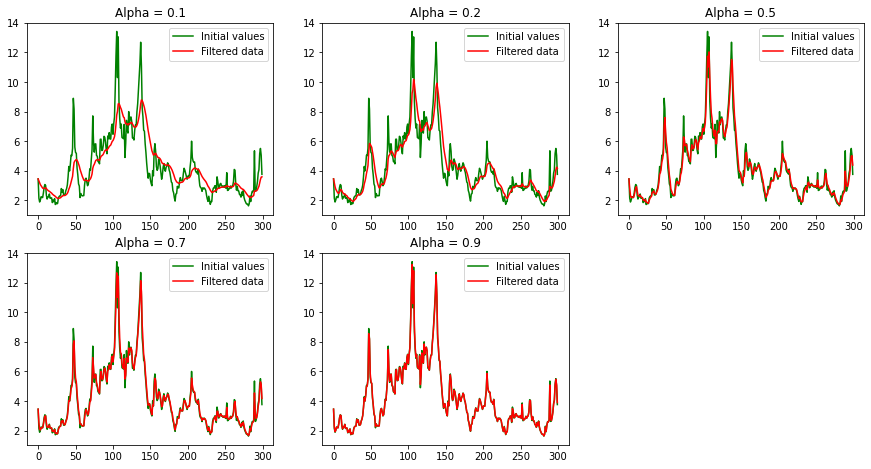

In [ ]:
alphas = [0.1, 0.2, 0.5, 0.7, 0.9]

resulting_arrays = []

for alpha in alphas:
  resulting_arrays.append(holt_filter(Values, alpha))

fig = plt.figure()  

fig.set_figwidth(15)
fig.set_figheight(12)

for i in range(len(resulting_arrays)):
  plt.subplot(3,3,(i+1))
  plt.plot(Values, color='g', label='Initial values')
  plt.plot(holt_filter(Values, alphas[i]), color='r', label='Filtered data')
  plt.title(f"Alpha = {alphas[i]}")
  plt.legend()

plt.show()

As it is clearly seen from the plots, the greater $α$ is, the less noice is reduced.

The reason why the plot shows that the more the $α$ value, the less noise is cleaned is because of the way the Holt filter algorithm works. As the smoothing factor $α$ gets closer to 1, the filter becomes more responsive to changes in the data, and thus gives more weight to the current value $X(t)$ and less weight to the previous filtered value $Y(t-1)$. This means that the filter is more sensitive to the current value, and less sensitive to the previous filtered value.

As a result, when the smoothing factor α is closer to 1, the filter is more responsive to short-term fluctuations in the data, and thus tends to remove less noise. On the other hand, as the smoothing factor $α$ gets closer to 0, the filter becomes less responsive to changes in the data, and thus gives less weight to the current value $X(t)$ and more weight to the previous filtered value $Y(t-1)$. This means that the filter is less sensitive to the current value, and more sensitive to the previous filtered value. As a result, when the smoothing factor $α$ is closer to 0, the filter is less responsive to short-term fluctuations in the data, and thus tends to remove more noise.

It's important to note that the choice of smoothing factor $α$ will depend on the specific characteristics of the data, and the goal of the analysis. A high value of alpha can be useful when the goal is to keep the short-term fluctuations, while a low value of alpha can be useful when the goal is to remove the noise and identify long-term patterns.

## **3.3 - Prediction**



a) In order to create the best possible prediction using the Holt filter, it is important to select an appropriate value of alpha. The value of alpha determines the weight given to the current value and the previous filtered value. A high value of alpha (close to 1) will give more weight to the current value, making the filter more responsive to short-term fluctuations in the data. A low value of alpha (close to 0) will give more weight to the previous filtered value, making the filter less responsive to short-term fluctuations in the data.
To select the best value of alpha, it's recommended to test different values of alpha and evaluate their performance using metrics such as Mean Absolute Error (MAE) or Mean Squared Error (MSE) and choose the value of alpha that leads to the lowest error rate.

b) To create a prediction + 2 months using the Holt filter, you can use the filtered value from the previous time step $Y(t-1)$ and the current value $X(t)$ to estimate the filtered value at 2 time steps ahead $Y(t+2)$ using the equation:<br><br>
$$Y(t+2) = α\cdot X(t+2) + (1 − α) \cdot Y(t − 1)$$<br><br>
Where $X(t+2)$ is the current value at time $t+2$ and $Y(t+1)$ is the filtered value at time $t+1$

c) To extend and generalize the equation to N months ahead, you can use the filtered value from the previous time step $Y(t-1)$ and the current value $X(t)$ to estimate the filtered value at N time steps ahead $Y(t+N)$ using the equation:
<br><br>
$$Y(t+N) = α\cdot X(t+N) + (1 − α) \cdot Y(t + N - 1)$$<br><br>
Where $X(t+N)$ is the current value at time $(t+N)$ and $Y(t+N-1)$ is the filtered value at time $(t+N-1)$.

e) Implementation (plotting in f)

In [ ]:
def holt_filter_prediction(data, alpha, N):
    """
    Function to apply the Holt filter to a time series dataset and make predictions n_months ahead.
    Parameters:
    - data: The time series data
    - alpha: The smoothing factor (0 < alpha < 1)
    - N: The number of months ahead to make predictions
    Returns:
    - predictions: A list of predictions n_months ahead of the original data
    """
    filtered = holt_filter(data, alpha)
    predictions = []
    for i in range(N):
        predictions.append(alpha * data[-1] + (1 - alpha) * filtered[-1])
        filtered.append(predictions[-1])
    return predictions

print(holt_filter_prediction(Values, 0.5,2))


[4.074704895325936, 3.9173524476629678]


This function takes three parameters, the time series data, the smoothing factor (alpha), and the number of months ahead to make predictions (N). The function finds Holt Filtered dataset by using function previously implemented. After that, it uses the last filtered value and the last data point to make predictions n_months ahead. The predictions are stored in a list and returned at the end of the function.

Now to finding the best value of alpha.
Here's an a Python function that finds the best value of alpha for the Holt filter algorithm using Mean Absolute Error (MAE) as the evaluation metric:

In [ ]:
def find_best_alpha(data, alphas):
    """
    Function to find the best value of alpha for the Holt filter algorithm using MAE.
    Parameters:
    - data: The time series data
    - alphas: A list of alpha values to test
    Returns:
    - best_alpha: The best alpha value
    """
    def mean_absolute_error(predictions, actual):
        #nested function to find MAE
        return sum(abs(predictions[i]-actual[i]) for i in range(len(actual)))/len(actual)

    # reimplimentation of holt algorithm within the function
    best_alpha = 0
    best_mae = float('inf')
    for alpha in alphas:
        filtered = [data[0]]  # Initialize the filtered data with the first value
        for i in range(1, len(data)):
            filtered.append(alpha * data[i] + (1 - alpha) * filtered[i-1])
        predictions = filtered[-len(data):]
        mae = mean_absolute_error(predictions, data)
        if mae < best_mae:
            best_mae = mae
            best_alpha = alpha
    return best_alpha

This function takes two parameters, the time series data and a list of alpha values to test. The function first initializes the filtered data with the first value of the input data. Then, it loops through the list of alpha values, applies the Holt filter algorithm using each value and calculates the MAE between the filtered data and the actual data by using the function mean_absolute_error. The function then compares the MAE of each alpha and return the alpha value with the lowest MAE.

Let's test the function

In [ ]:
best_alpha = find_best_alpha(Values, alphas)
print(best_alpha)

0.9


It chose the biggest alpha because it has the least error. It makes perfect sense! For further test, I will use this alpha, but actually the bigger alpha would be more accurate


f) How reliable this information is? (Also plotting a figure representing prediction)


To check it, I will remove last 3 months of actual data and insert predicted data to the end and plot it next to original data.

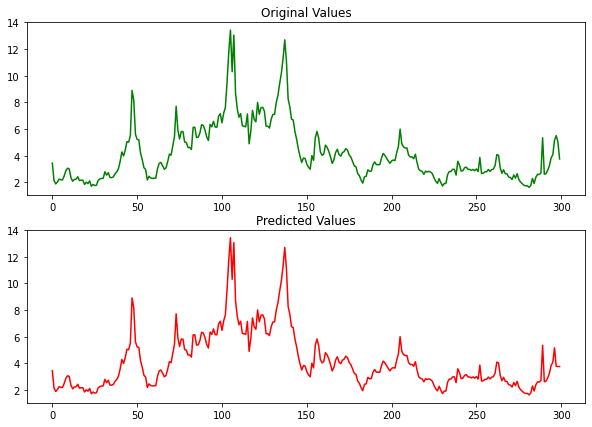

In [ ]:
reliability_test = Values[:-3]

new_predictions = holt_filter_prediction(Values,0.9 , 3)

predicted_values = reliability_test + new_predictions

fig = plt.figure()  

fig.set_figwidth(10)
fig.set_figheight(7)

plt.subplot(2,1,1)
plt.title('Original Values')
plt.plot(Values, color='g', label='Original Values')
plt.subplot(2,1,2)
plt.title('Predicted Values')
plt.plot(predicted_values, color='r', label='Predicted Values')

plt.show()

Considering the similarity of this plots, it is very easy to conclude that it is reliable, but it is important to note that the predictions would be reliable for small periods only, for longer period, there can be a lot of other different factor that would contribute to the changing of time series

g) 

**Statement:** Would it be possible for you to provide a complete prediction for the whole YEARS +1, +2, +3, using the complete information of years before, using mean, median, trimean, moving mean, moving median, moving trimean and so on? In other words, is it possible to mix some of the above statistics (median, mad, trimean, box plots) with the exponential filter to create a statistically meaningful prediction for the next year, assuming statistics of the precedent year? That is, how to mix the best of each statistic to provide the best prediction possible? Provide a python program associated with that prediction and provide summary statistics predictions for years +1 and +2. Plot a figure representing past values and prediction, with an associated confidence level, given past and future MAD (using ideas developed in section e)


**Response:**

It is possible to use a combination of different statistics such as mean, median, trimean, moving mean, moving median, moving trimean, etc. with the exponential filter to create a statistically meaningful prediction for the next year. However, the best approach would depend on the specific dataset and problem at hand.

One possible way to mix the best of each statistic is to use the exponential filter for the main trend and seasonality of the data and use other statistics such as median, mad, trimean, box plots to model the remaining noise or irregular components of the data.

Here's a Python program that uses a combination of the exponential filter and the median to make predictions for the next two years:

In [ ]:
def holt_median_prediction(data, alpha, n_years):
    """
    Function to apply the Holt filter with median to a time series dataset and make predictions n_years ahead.
    Parameters:
    - data: The time series data
    - alpha: The smoothing factor (0 < alpha < 1)
    - n_years: The number of years ahead to make predictions
    Returns:
    - predictions: A list of predictions n_years ahead of the original data
    """
    filtered = [data[0]]  # Initialize the filtered data with the first value
    predictions = []
    median = np.median(data)
    for i in range(1, len(data)):
        filtered.append(alpha * data[i] + (1 - alpha) * filtered[i-1])
    for j in range(n_years*12): #years converted to month
        predictions.append(alpha * data[-1] + (1 - alpha) * filtered[-1] + median)
        filtered.append(predictions[-1])
    return predictions


In [ ]:
predictions = holt_median_prediction(Values, 0.9, 2) #2 years
print(f"Predictions for the text 2 years(24 month):\n{predictions}")

Predictions for the text 2 years(24 month):
[7.318313808270648, 7.660831380827064, 7.6950831380827065, 7.69850831380827, 7.698850831380827, 7.698885083138082, 7.698888508313808, 7.698888850831381, 7.698888885083138, 7.698888888508313, 7.698888888850831, 7.698888888885083, 7.698888888888508, 7.698888888888851, 7.6988888888888845, 7.698888888888888, 7.698888888888888, 7.698888888888888, 7.698888888888888, 7.698888888888888, 7.698888888888888, 7.698888888888888, 7.698888888888888, 7.698888888888888]


It's important to note that this is just one possible approach, and there are other methods and techniques to improve the quality of the predictions and to estimate their uncertainty, such as using more complex models, ensemble methods, or integrating external information and domain knowledge.

Plotting

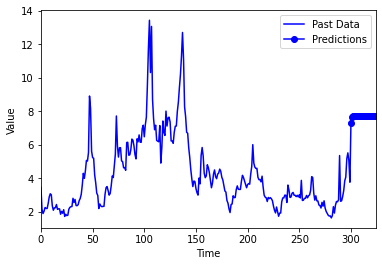

In [ ]:
# Plot the past data
plt.plot(Values+predictions, label='Past Data', color='blue')

# Plot the predictions
plt.plot(range(len(Values), len(Values) + len(predictions)), predictions, label='Predictions', linestyle='solid', marker='o', color='blue')

# Add axis labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Set the x-axis limit to include both the past data and the predictions
plt.xlim(0, len(Values) + len(predictions))

# Show the plot
plt.show()

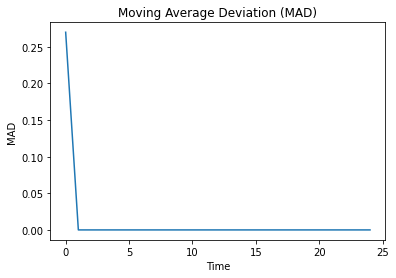

In [ ]:
def plot_mad(data, predictions):
    """
    Function to plot the Moving Average Deviation (MAD) of the past and future data.
    Parameters:
    - data: The past data
    - predictions: The future predictions
    """
    mad = [np.median([abs(data[i]-data[i-1]) for i in range(1, len(data))])]
    for i in range(len(predictions)):
        mad.append(np.median([abs(predictions[i]-predictions[i-1]) for i in range(1, len(predictions))]))
    plt.plot(mad)
    plt.title('Moving Average Deviation (MAD)')
    plt.xlabel('Time')
    plt.ylabel('MAD')
    plt.show()

plot_mad(Values, predictions)